In [56]:
import kagglehub
import pandas as pd
import numpy as np
import os
from lifelines import KaplanMeierFitter, CoxPHFitter 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Download the dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("davinwijaya/employee-turnover")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\davinwijaya\employee-turnover\versions\1


### Load the dataset

In [3]:
file_name = "turnover.csv"
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path,encoding='latin1')

In [4]:
df.head(5)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


### Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [6]:
df.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: xlabel='event', ylabel='stag'>

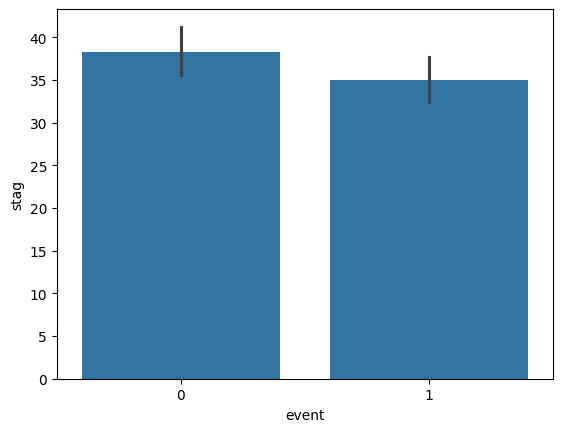

In [7]:
sns.barplot(data=df, x="event", y="stag")

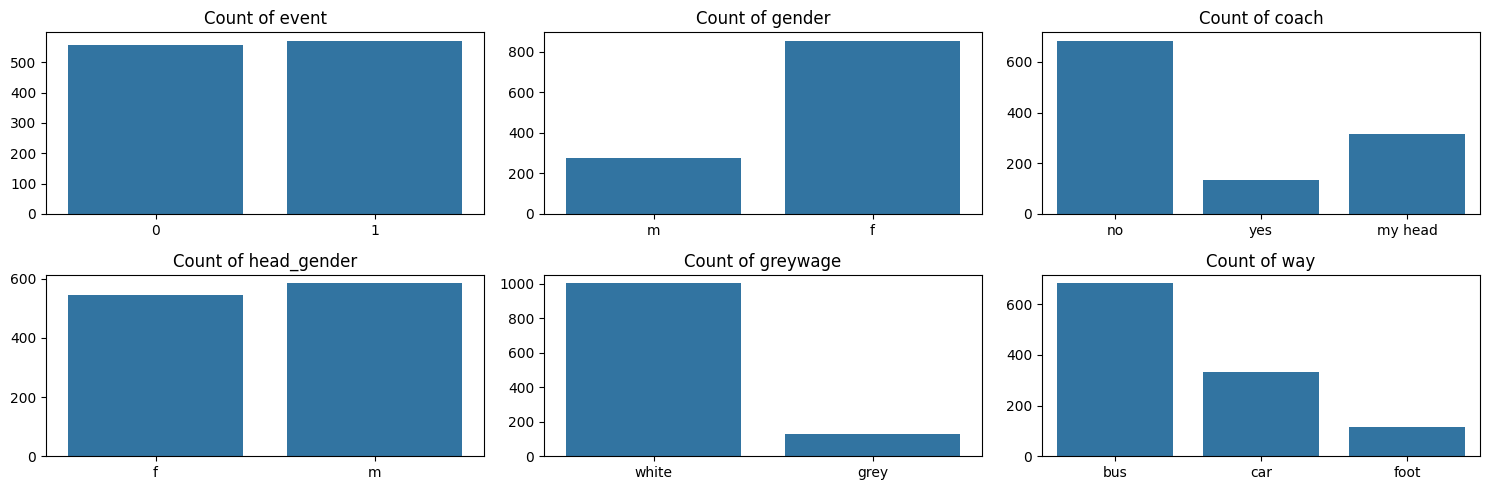

In [77]:
column_list = ["event","gender","coach","head_gender","greywage","way"]
column_list_filtered = [col for col in column_list]

fig,axes=plt.subplots(2,3,figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.countplot(data=df,x=col,ax=ax)
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

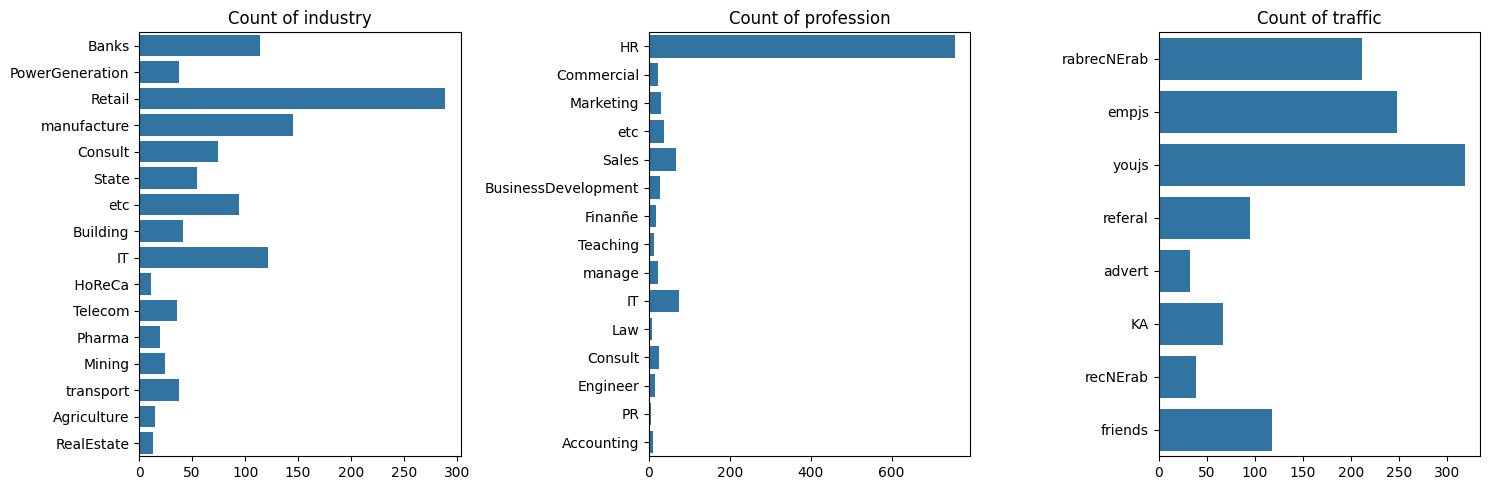

In [78]:
column_list = ["industry","profession","traffic"]
column_list_filtered = [col for col in column_list]

fig,axes=plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.countplot(data=df,y=col,ax=ax)
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

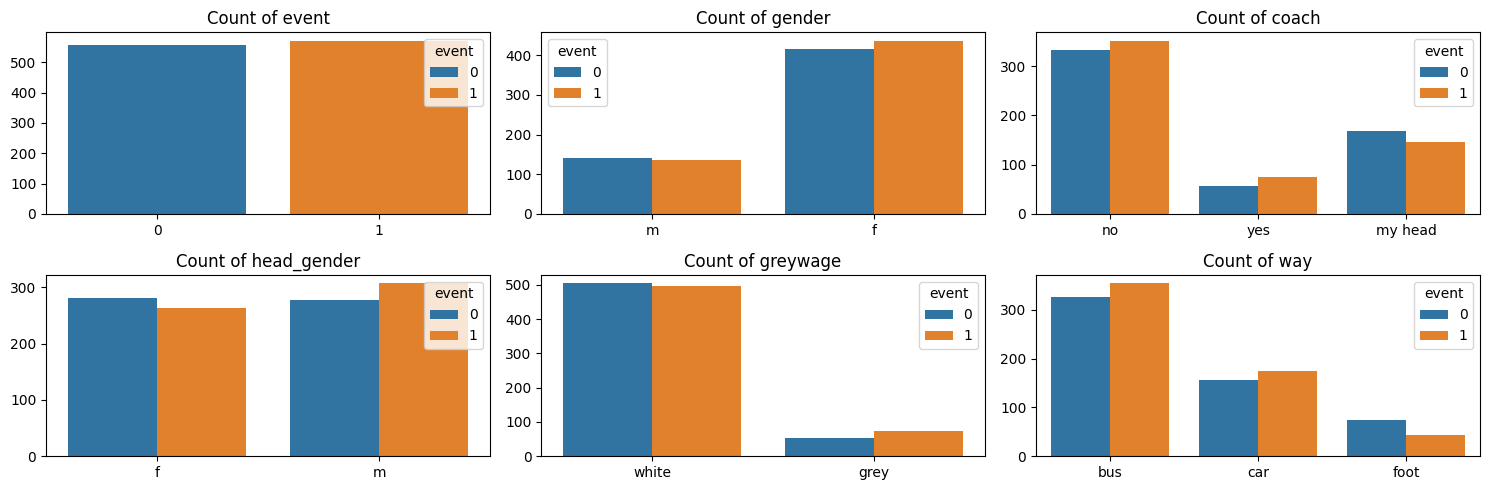

In [75]:
column_list = ["event","gender","coach","head_gender","greywage","way"]
column_list_filtered = [col for col in column_list]

fig,axes=plt.subplots(2,3,figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.countplot(data=df,x=col,ax=ax,hue="event")
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

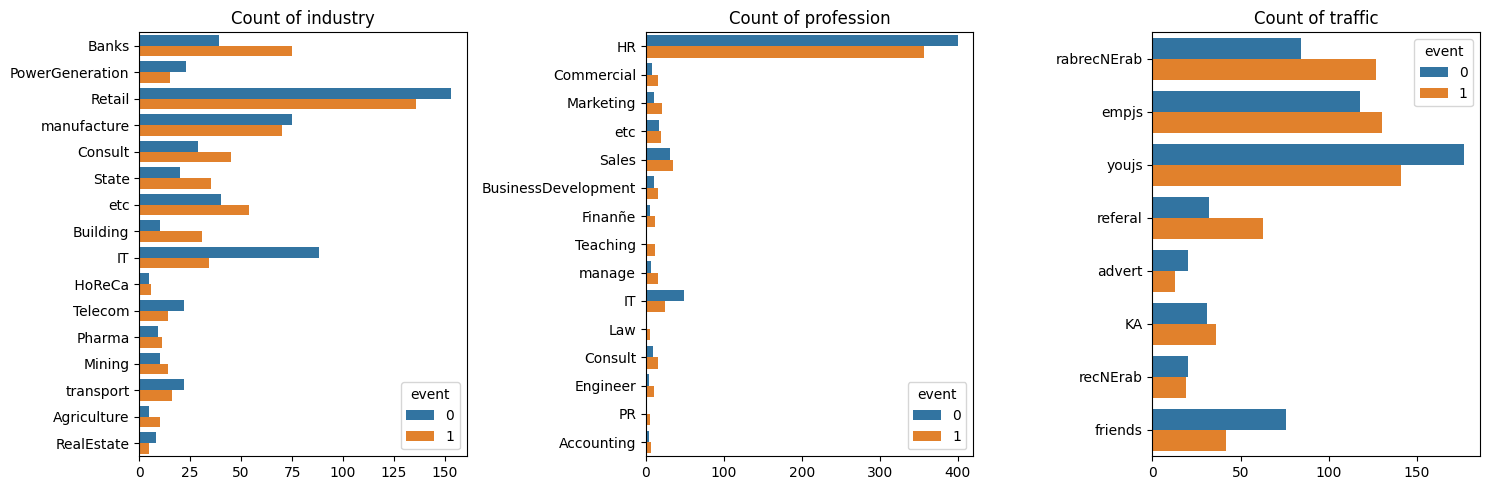

In [76]:
column_list = ["industry","profession","traffic"]
column_list_filtered = [col for col in column_list]

fig,axes=plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.countplot(data=df,y=col,ax=ax,hue="event")
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

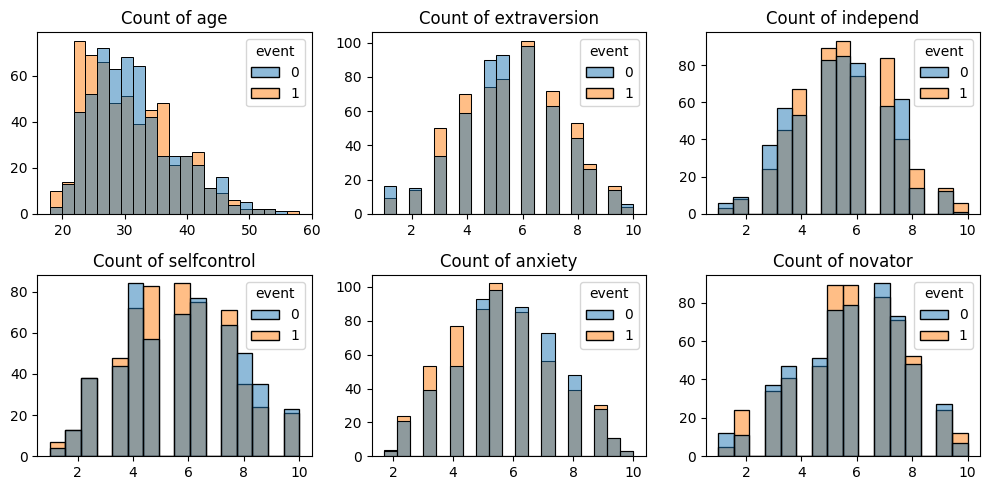

In [99]:
column_list = ["age","extraversion","independ","selfcontrol","anxiety","novator"]
column_list_filtered = [col for col in column_list]

fig,axes=plt.subplots(2,3,figsize=(10,5))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.histplot(data=df,x=col,ax=ax,hue="event")
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

### Kaplan-Meier Curve

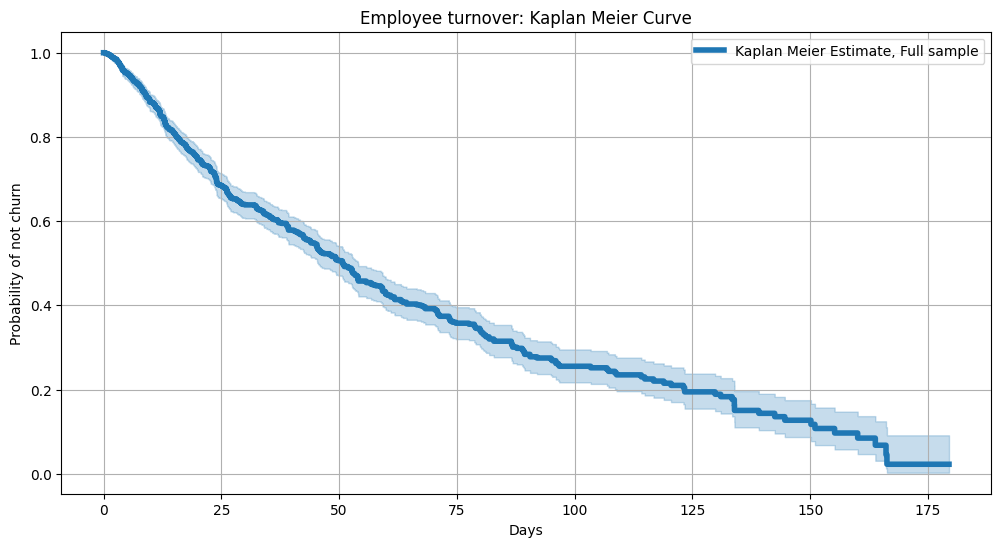

In [22]:
kmf = KaplanMeierFitter()

kmf.fit(df["stag"], df["event"], label="Kaplan Meier Estimate, Full sample")

kmf.plot(linewidth=4, figsize=(12,6))
plt.title("Employee turnover: Kaplan Meier Curve")
plt.xlabel("Days")
plt.ylabel("Probability of not churn")
plt.grid(True)

### Examining some variables

event
0    Axes(0.547727,0.11;0.352273x0.77)
1    Axes(0.547727,0.11;0.352273x0.77)
Name: stag, dtype: object

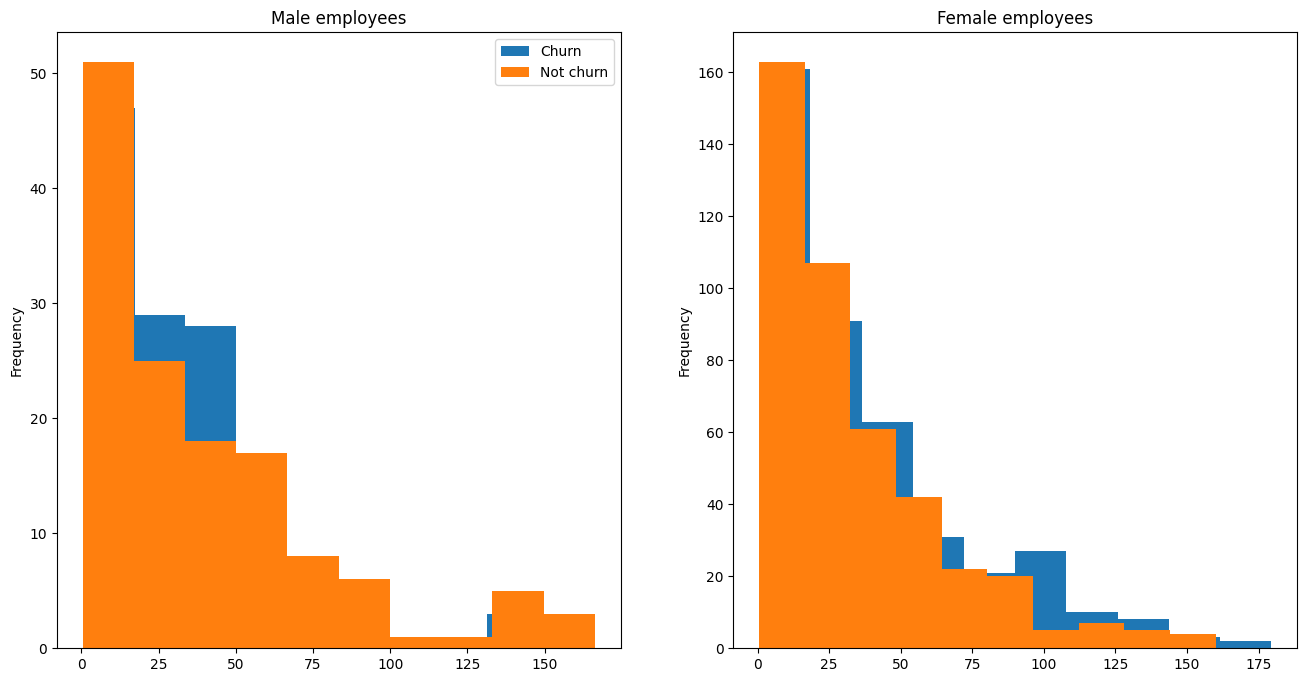

In [18]:
# Let's look at the 'gender'
df1 = df[df.gender=="m"]
df2 = df[df.gender=="f"]
fig, ax = plt.subplots(1,2, figsize=(16,8))
df1.groupby('event')['stag'].plot(kind='hist', ax=ax[0], title='Male employees')
ax[0].legend(labels=['Churn', 'Not churn'])
df2.groupby('event')['stag'].plot(kind='hist', ax=ax[1], title='Female employees')

Text(0, 0.5, 'Probability of not churn')

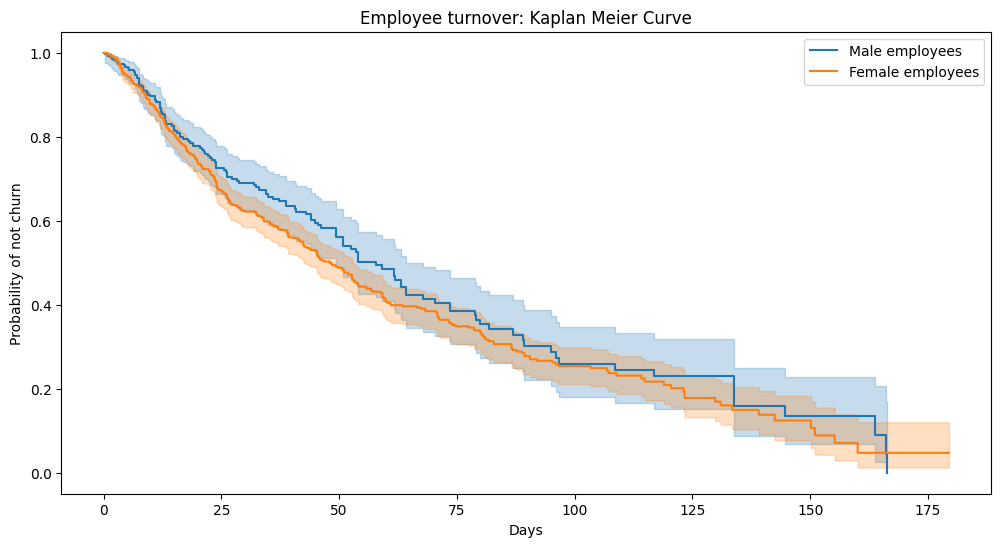

In [23]:
kmf.fit(df1["stag"], df1["event"])
kmf.plot(label="Male employees", figsize=(12,6))
kmf.fit(df2["stag"], df2["event"])
kmf.plot(label="Female employees")
plt.title("Employee turnover: Kaplan Meier Curve")
plt.xlabel("Days")
plt.ylabel("Probability of not churn")

event
0    Axes(0.672059,0.11;0.227941x0.77)
1    Axes(0.672059,0.11;0.227941x0.77)
Name: stag, dtype: object

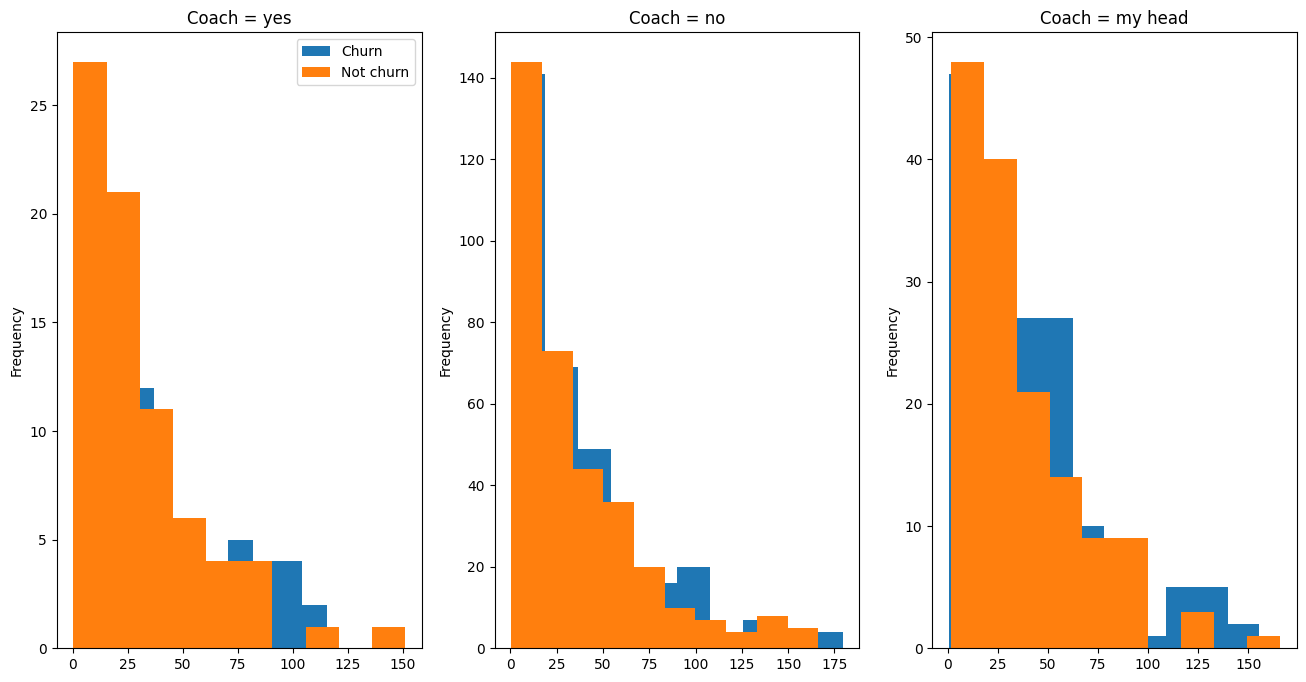

In [24]:
# Let's look at the 'coach'
df1 = df[df.coach=="yes"]
df2 = df[df.coach=="no"]
df3 = df[df.coach=="my head"]
fig, ax = plt.subplots(1,3, figsize=(16,8))
df1.groupby('event')['stag'].plot(kind='hist', ax=ax[0], title='Coach = yes')
ax[0].legend(labels=['Churn', 'Not churn'])
df2.groupby('event')['stag'].plot(kind='hist', ax=ax[1], title='Coach = no')
df3.groupby('event')['stag'].plot(kind='hist', ax=ax[2], title='Coach = my head')

Text(0, 0.5, 'Probability of not churn')

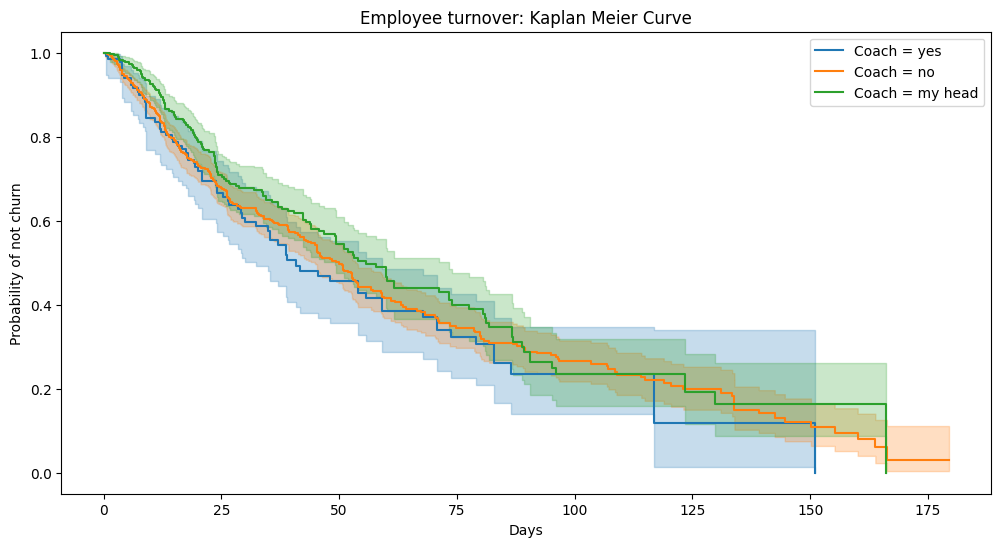

In [25]:
kmf.fit(df1["stag"], df1["event"])
kmf.plot(label="Coach = yes", figsize=(12,6))
kmf.fit(df2["stag"], df2["event"])
kmf.plot(label="Coach = no")
kmf.fit(df3["stag"], df3["event"])
kmf.plot(label="Coach = my head")
plt.title("Employee turnover: Kaplan Meier Curve")
plt.xlabel("Days")
plt.ylabel("Probability of not churn")

event
0    Axes(0.547727,0.11;0.352273x0.77)
1    Axes(0.547727,0.11;0.352273x0.77)
Name: stag, dtype: object

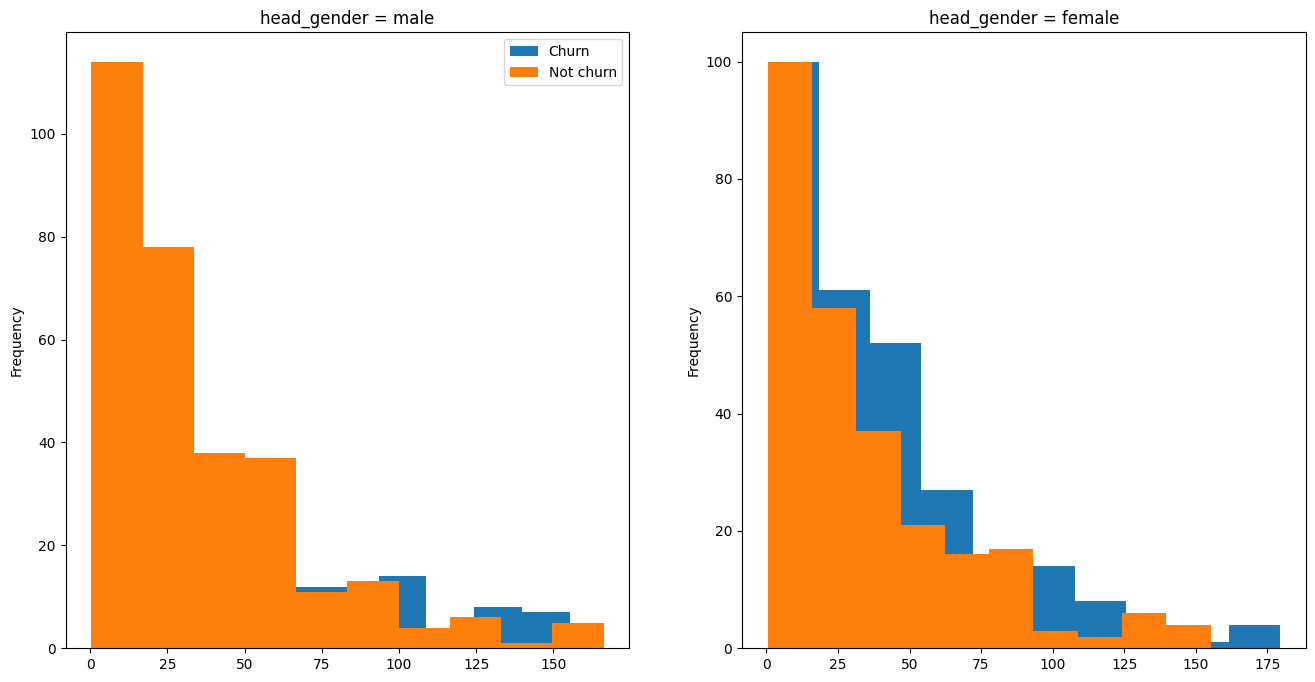

In [15]:
# Let's look at the 'head_gender'
df1 = df[df.head_gender=="m"]
df2 = df[df.head_gender=="f"]
fig, ax = plt.subplots(1,2, figsize=(16,8))
df1.groupby('event')['stag'].plot(kind='hist', ax=ax[0], title='head_gender = male')
ax[0].legend(labels=['Churn', 'Not churn'])
df2.groupby('event')['stag'].plot(kind='hist', ax=ax[1], title='head_gender = female')

Text(0, 0.5, 'Probability of not churn')

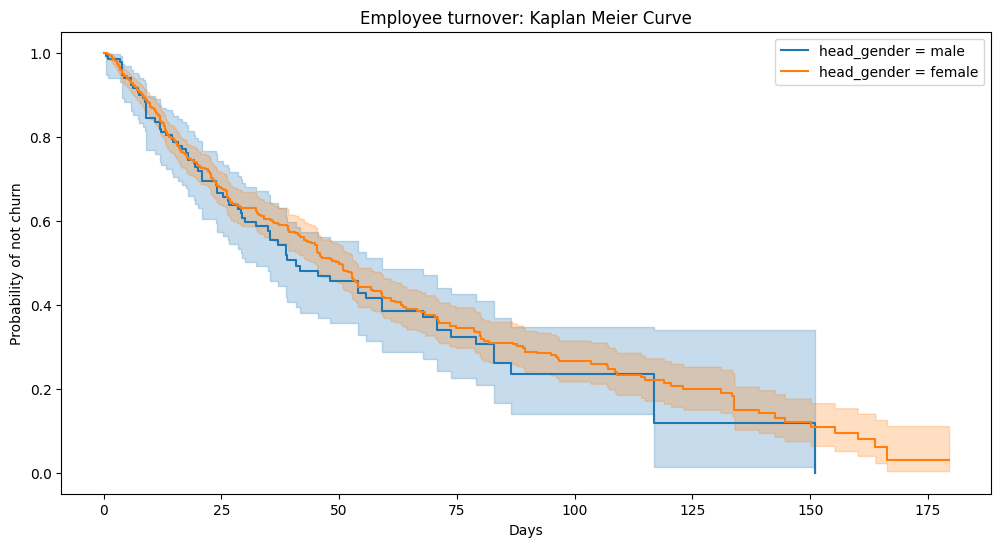

In [26]:
kmf.fit(df1["stag"], df1["event"])
kmf.plot(label="head_gender = male", figsize=(12,6))
kmf.fit(df2["stag"], df2["event"])
kmf.plot(label="head_gender = female")
plt.title("Employee turnover: Kaplan Meier Curve")
plt.xlabel("Days")
plt.ylabel("Probability of not churn")

event
0    Axes(0.547727,0.11;0.352273x0.77)
1    Axes(0.547727,0.11;0.352273x0.77)
Name: stag, dtype: object

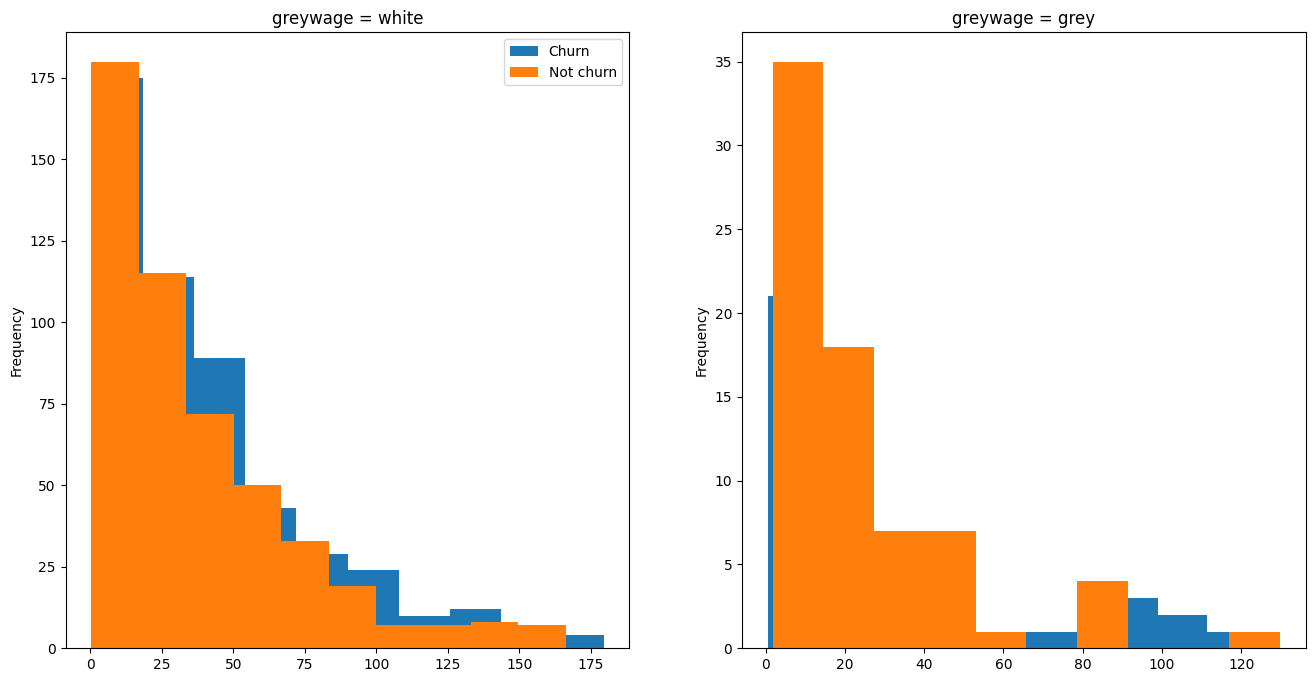

In [27]:
# Let's look at the 'greywage'
df1 = df[df.greywage=="white"]
df2 = df[df.greywage=="grey"]
fig, ax = plt.subplots(1,2, figsize=(16,8))
df1.groupby('event')['stag'].plot(kind='hist', ax=ax[0], title='greywage = white')
ax[0].legend(labels=['Churn', 'Not churn'])
df2.groupby('event')['stag'].plot(kind='hist', ax=ax[1], title='greywage = grey')

Text(0, 0.5, 'Probability of not churn')

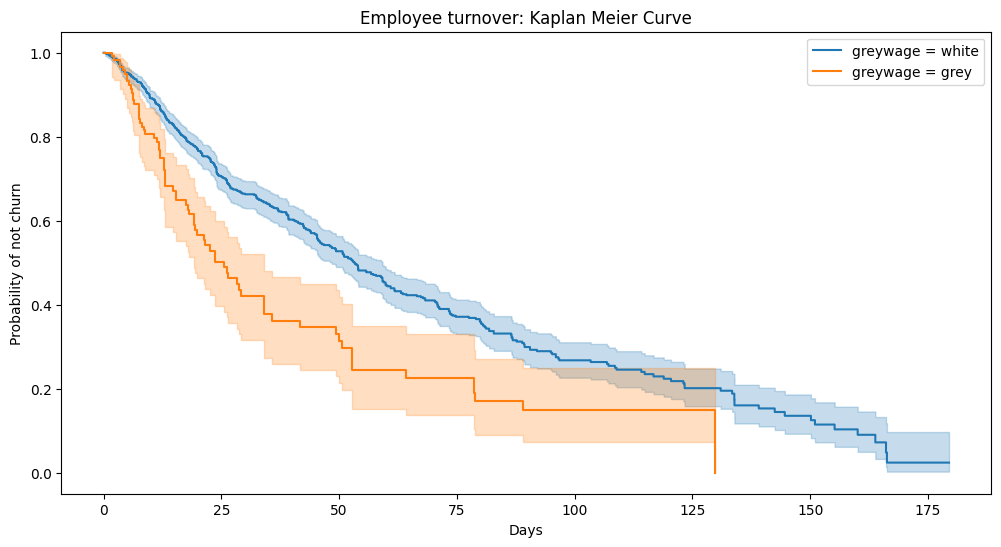

In [28]:
kmf.fit(df1["stag"], df1["event"])
kmf.plot(label="greywage = white", figsize=(12,6))
kmf.fit(df2["stag"], df2["event"])
kmf.plot(label="greywage = grey")
plt.title("Employee turnover: Kaplan Meier Curve")
plt.xlabel("Days")
plt.ylabel("Probability of not churn")

### Cox proportional hazards model

#### Model with greywage

In [30]:
dfu = df[["greywage","event"]]
dfu

,greywage,event
0,white,1
1,white,1
2,white,1
3,white,1
4,white,1
...,...,...
1124,white,0
1125,white,0
1126,white,0
1127,grey,0


In [35]:
dfd = pd.get_dummies(dfu,drop_first=True)
dfd["stag"] = df.stag
dfd.rename(columns={"greywage_white":"greywage"},inplace=True)

In [36]:
dfd

,event,greywage,stag
0,1,True,7.030801
1,1,True,22.965092
2,1,True,15.934292
3,1,True,15.934292
4,1,True,8.410678
...,...,...,...
1124,0,True,10.611910
1125,0,True,10.611910
1126,0,True,118.800821
1127,0,False,49.412731


In [40]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col="stag", event_col="event")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3460.89
         time fit was run = 2024-10-21 06:28:39 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
greywage   -0.59       0.56       0.13            -0.83            -0.34                 0.43                 0.71

            cmp to     z      p   -log2(p)
covariate                                 
greywage      0.00 -4.66 <0.005      18.27
---
Concordance = 0.53
Partial AIC = 6923.78
log-likelihood ratio test = 18.82 on 1 df
-log2(p) of ll-ratio test = 16.09

<Axes: xlabel='log(HR) (95% CI)'>

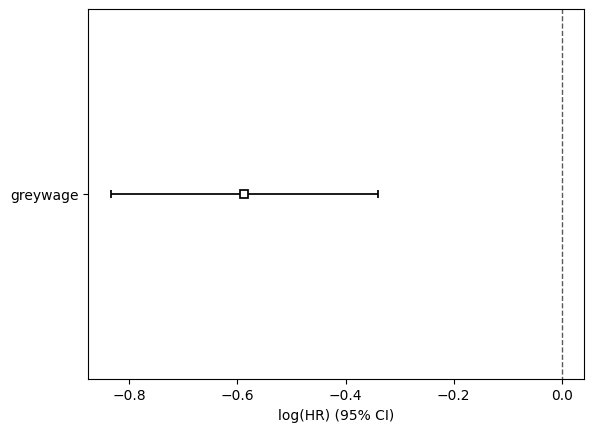

In [41]:
cph.plot()

<Axes: >

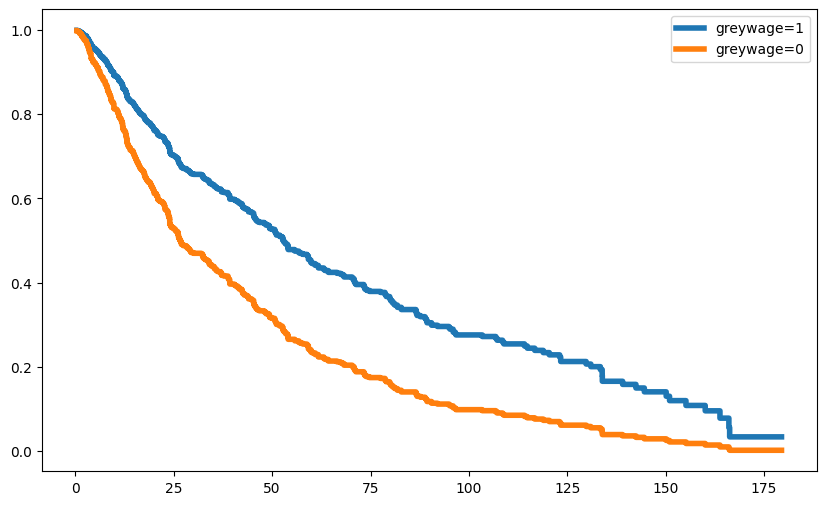

In [43]:
cph.plot_covariate_groups('greywage', [1, 0], plot_baseline=False, figsize=(10, 6), lw=4)

#### Model with multiple variables

In [44]:
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [51]:
# Including additional variables, data setup
dfu = df[['event','gender','age','coach','head_gender','greywage','extraversion','independ','selfcontrol','anxiety']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['stag'] = df.stag
dfd

,event,age,extraversion,independ,selfcontrol,anxiety,gender_m,coach_no,coach_yes,head_gender_m,greywage_white,stag
0,1,35.0,6.2,4.1,5.7,7.1,True,True,False,False,True,7.030801
1,1,33.0,6.2,4.1,5.7,7.1,True,True,False,True,True,22.965092
2,1,35.0,6.2,6.2,2.6,4.8,False,True,False,True,True,15.934292
3,1,35.0,5.4,7.6,4.9,2.5,False,True,False,True,True,15.934292
4,1,32.0,3.0,4.1,8.0,7.1,True,False,True,False,True,8.410678
...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0,41.0,8.6,3.4,2.6,4.8,False,False,False,True,True,10.611910
1125,0,41.0,8.6,3.4,2.6,4.8,False,False,False,True,True,10.611910
1126,0,34.0,4.6,5.5,7.2,6.3,False,True,False,False,True,118.800821
1127,0,51.0,3.8,7.6,5.7,6.3,False,True,False,True,False,49.412731


In [52]:
# Fitting Cox Proportional Model
cph = CoxPHFitter()
cph.fit(dfd, duration_col='stag', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3445.98
         time fit was run = 2024-10-21 06:58:12 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
age              0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
extraversion     0.04       1.04       0.03            -0.02             0.11                 0.98                 1.11
independ         0.01       1.01       0.03            -0.06             0.07                 0.94                 1.07
selfcontrol     -0.03       0.97       0.03            -0.09             0.03                 0.91                 1.03
anxiety         -0.04       0.96       0.03            -0.11             0.02                 0.90                 1.02
gender_m        -0.06       0.94       0.11            -0.27             0.15                 0.76                 1.16
coach_no         0.06       1.06       0.10            -0.14             0.26                 0.87                 1.30
coach_yes        0.25       1.28       0.14            -0.04             0.53                 0.97                 1.69
head_gender_m    0.02       1.02       0.09            -0.15             0.20                 0.86                 1.22
greywage_white  -0.59       0.55       0.13            -0.84            -0.34                 0.43                 0.71

                 cmp to     z      p   -log2(p)
covariate                                      
age                0.00  3.47 <0.005      10.92
extraversion       0.00  1.21   0.23       2.15
independ           0.00  0.17   0.87       0.21
selfcontrol        0.00 -1.13   0.26       1.96
anxiety            0.00 -1.36   0.17       2.52
gender_m           0.00 -0.60   0.55       0.87
coach_no           0.00  0.57   0.57       0.82
coach_yes          0.00  1.71   0.09       3.53
head_gender_m      0.00  0.26   0.80       0.33
greywage_white     0.00 -4.62 <0.005      18.02
---
Concordance = 0.60
Partial AIC = 6911.96
log-likelihood ratio test = 48.64 on 10 df
-log2(p) of ll-ratio test = 21.01

<Axes: xlabel='log(HR) (95% CI)'>

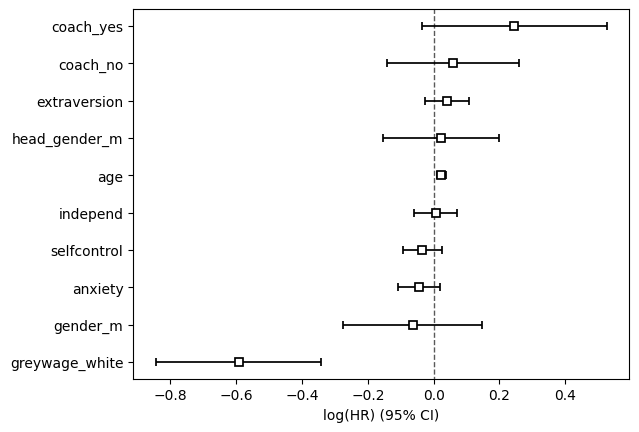

In [53]:
cph.plot()

In [48]:
# Including additional variables, data setup
dfu = df[['event','age','greywage']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['stag'] = df.stag
dfd

,event,age,greywage_white,stag
0,1,35.0,True,7.030801
1,1,33.0,True,22.965092
2,1,35.0,True,15.934292
3,1,35.0,True,15.934292
4,1,32.0,True,8.410678
...,...,...,...,...
1124,0,41.0,True,10.611910
1125,0,41.0,True,10.611910
1126,0,34.0,True,118.800821
1127,0,51.0,False,49.412731


In [49]:
# Fitting Cox Proportional Model
cph = CoxPHFitter()
cph.fit(dfd, duration_col='stag', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3455.24
         time fit was run = 2024-10-21 06:56:33 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
age              0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
greywage_white  -0.57       0.57       0.13            -0.81            -0.32                 0.44                 0.73

                 cmp to     z      p   -log2(p)
covariate                                      
age                0.00  3.41 <0.005      10.58
greywage_white     0.00 -4.48 <0.005      17.01
---
Concordance = 0.57
Partial AIC = 6914.49
log-likelihood ratio test = 30.11 on 2 df
-log2(p) of ll-ratio test = 21.72